# 7. Stabilité

## 7.1 Introduction

La stabilité étant essentielle à tout système en boucle fermée, il est utile de définir des critères permettant d'établir si le système est stable ou non.

Le cercle unité semble jouer un rôle important pour la stabilité des systèmes échantillonnés. Par exemple:

- l'étude de l'importance des pôles du chapitre 4 a montré que seuls les pôles à l'intérieur du cercle unité génèrent un signal amorti
- l'étude de la transformation des pôles par échantillonnage a montré que le demi-plan gauche dans le domaine de Laplace devient l'intérieur du cercle unité

## 7.2 Stabilité BIBO

#### Définition

Un système discret au repos, linéaire, causal et stationnaire est BIBO stable quand toute entrée bornée fournit une sortie bornée.

#### Théorème

Un système discret au repos, linéaire, causal et stationnaire décrit par une fonction de transfert rationnelle propre G(z) est BIBO stable si et seulement si tous ses pôles sont à l'intérieur du cercle unité.

## 7.3 Critères algébriques

### Critère de Routh-Hurwitz

Le critère de Routh-Hurwitz permet de vérifier que les zéros d'un polynôme se trouvent bien dans le demi-plan complexe gauche. Afin de pouvoir l'utiliser, il faut donc transformer le plan $z$ vers le plan $s$. Pour cela, la transformation bilinéaire, ou de Möbius est adoptée:

$$ w = \frac{z-1}{z+1} $$

dont l'inverse est:

$$ z = \frac{1+w}{1-w} $$

Il suffit alors de vérifier que le polynôme obtenu possède bien des pôles dans le demi-plan gauche, en appliquant le critère de Routh-Hurwitz.

#### Exemple 1

Soit le système en BO décrit par la fonction de transfert:

$$ G(z) = \frac{10^{-3}(1.23z+1.21)}{z^2-1.95z+0.95} $$

On ajoute un régulateur de gain $K_p$. La boucle fermée devient:

$$ \frac{Y(z)}{Y_c(z)} = \frac{10^{-3}K_p(1.23z+1.21)}{z^2+(1.23\cdot 10^{-3}K_p-1.95)z+0.95+1.21\cdot 10^{-3}K_p} $$

Le dénominateur (polynôme caractéristique) à analyser est donc:

$$ A(z) = z^2+(1.23\cdot 10^{-3}K_p-1.95)z+0.95+1.21\cdot 10^{-3}K_p $$

En appliquant la transformation bilinéaire, on obtient le polynôme suivant:


\begin{align}
  A'(w) &= A\left(\frac{1+w}{1-w}\right) \\
  &= \frac{(3.9-0.02\cdot 10^{-3}K_p)w^2+(0.1-2.42\cdot 10^{-3}K_p)w+2.44\cdot 10^{-3}K_p}{w^2-2w+1}
\end{align}

Le tableau de Routh appliqué au numérateur de $A'(w)$ donne:

| | | |
|--|--|--|
| $$ 3.9-0.02\cdot 10^{-3}K_p $$ | $$ 2.44\cdot 10^{-3}K_p $$ | $$ 0 $$ |
| $$ 0.1-2.42\cdot 10^{-3}K_p $$ | $$ 0 $$ | $$ 0 $$ |
| $$ 2.44\cdot 10^{-3}K_p $$ | $$ 0 $$ | $$ 0 $$ |
| $$ 0 $$ | $$ 0 $$ | $$ 0 $$ |

Il faut donc que ces inégalités soient respectées:

\begin{align}
  3.9-0.02\cdot 10^{-3}K_p > 0 \\
  0.1-2.42\cdot 10^{-3}K_p > 0 \\
  2.44\cdot 10^{-3}K_p > 0
\end{align}

Par conséquent, la stabilité en BF est garantie pour:

$$ 0 < K_p < 41.3 $$
***

### Critère de Jury

Le critère de Routh-Hurwitz étant mathématiquement lourd à utiliser en discret à cause de la transformation bilinéaire, un autre critère existe afin de déterminer directement si les racines d'un polynôme se trouvent dans le cercle unité.

Soit le polynôme à coefficients réels de degré $n$:

$$ A(z) = a_0 z^n + a_1 z^{n-1} + \dots + a_{n-1} z + a_n $$

Le tableau suivant est d'abord construit:

| | | | | | |
|---|---|---|---|---|---|
| $$ \mathbf{a_0} $$ | $$ a_1 $$ | $$ \dots $$ | $$ a_{n-1} $$ | $$ a_n $$ | |
| $$ a_n $$ | $$ a_{n-1} $$ |  $$ \dots $$ | $$ a_1 $$ | $$ a_0 $$ | $$ \alpha_n = \frac{a_n}{a_0} $$ |
| $$ \mathbf{a_0^{(n-1)}} $$ | $$ a_1^{(n-1)} $$ | $$ \dots $$ | $$ a_{n-1}^{(n-1)} $$ | | |
| $$ a_{n-1}^{(n-1)} $$ | $$ a_{n-2}^{(n-1)} $$ |  $$ \dots $$ | $$ a_0^{(n-1)} $$ | | $$ \alpha_{n-1} = \frac{a_{n-1}^{(n-1)}}{a_0^{(n-1)}} $$ |
| | | | $$ \vdots $$ | | |
| $$ \mathbf{a_0^{(1)}} $$ | $$ a_1^{(1)} $$ |
| $$ a_1^{(1)} $$ | $$ a_0^{(1)} $$ | | | | $$ \alpha_1 = \frac{a_1^{(1)}}{a_0^{(1)}} $$ |
| $$ \mathbf{a_0^{(0)}} $$ |

avec

\begin{align}
  &a_j^{(i-1)} = a_j^{(i)} - \alpha_i a_{i-j}^{(i)} \qquad \qquad i = n, n-1, \dots, 1 \quad j = 0, 1, \dots, i-1 \\
  &a_j^{(n)} = a_j \qquad \qquad \qquad \qquad \, j = 0, 1, \dots, n
\end{align}

Pour construire le tableau, il faut:

- remplir la première ligne avec les coefficients du polynôme
- remplir la seconde ligne avec les coefficients du polynôme dans l'ordre inverse
- calculer la troisième ligne en multipliant la seconde ligne par $\alpha_n = a_n/a_0$ et en soustrayant le résultat à la première ligne; on obtient $n-1$ termes car le dernier est nul
- remplir la quatrième ligne en copiant la troisième ligne prise à rebours et en négligeant le dernier terme nul
- répéter ces opérations jusqu'à avoir $2n+1$ lignes

#### Théorème (critère de Jury)

Quand $a_0 > 0$, les zéros du polynôme A(z) sont tous à l'intérieur du cercle unité si et seulement si $a_0^{(i)} > 0,\, i = 0, 1, \dots, n-1$. De surcroît, si $a_0^{(i)} \neq 0,\, i=0, 1, \dots, n-1$, le nombre de coefficients $a_0^{(i)}$ négatifs est égal au nombre de zéros du polynôme A(z) à l'extérieur du cercle unité. 

#### Exemple 2

Soit le polynôme:

$$ A(z) = -z^3 - 0.7z^2 - 0.5z + 0.3 $$

En multipliant le polynôme par $-1$, le tableau donne:

| | | | | |
|---|---|---|---|---|
| $$ \mathbf{1} $$ | $$ 0.7 $$ | $$ 0.5 $$ | $$ 0.3 $$ |
| $$ 0.3 $$ | $$ 0.5 $$ | $$ 0.7 $$ | $$ 1 $$ | $$ \alpha_3 = -0.3 $$ |
| $$ \mathbf{0.91} $$ | $$ 0.85 $$ | $$ 0.71 $$ |
| $$ 0.71 $$ | $$ 0.85 $$ | $$ 0.91 $$ | | $$ \alpha_2 = 0.78 $$ |
| $$ \mathbf{0.36} $$ | $$ 0.19 $$ |
| $$ 0.19 $$ | $$ 0.36 $$ | | | $$ \alpha_1 = 0.53 $$ |
| $$ \mathbf{0.26} $$ |

Tous les coefficients en gras étant positifs, les racines du polynômes A(z) sont à m'intérieur du cercle unité.
***

#### Exemple 3

Reprenons le dénominateur caractéristique de l'exemple 1:

$$ A(z) = z^2+(1.23\cdot 10^{-3}K_p-1.95)z+0.95+1.21\cdot 10^{-3}K_p = z^2 + a_1z + a_2 $$

On peut construire le tableau en suivant la procédure, ce qui donne:

| | | | |
|---|---|---|---|
| $$ \mathbf{1} $$ | $$ a_1 $$ | $$ a_2 $$ |
| $$ a_2 $$ | $$ a_1 $$ | $$ 1 $$ | $$ \alpha_2 = \frac{a_2}{1} $$ |
| $$ \mathbf{1 - a_2^2} $$ | $$ a_1(1-a_2) $$ |
| $$ a_1(1-a_2) $$ | $$ 1 - a_2^2 $$ | | $$ \alpha_1 = \frac{a_1}{1+a_2} $$ |
| $$ \mathbf{1 - a_2^2 - \frac{a_1^2(1-a_2)}{1+a_2}} $$ |

Les conditions sont donc:

\begin{align}
  &1 - a_2^2 > 0 \\
  &1 - a_2^2 - \frac{a_1^2(1-a_2)}{1+a_2} = \frac{1-a_2}{1+a_2}\left((1+a_2)^2-a_1^2\right) > 0
\end{align}

De manière équivalente, on a:

\begin{align}
  &-1 < a_2 < 1 \\
  &(1+a_2)^2 > a_1^2
\end{align}

En remplaçant par les expressions de départ:

\begin{align}
  &-1 < 0.95+1.21\cdot 10^{-3}K_p < 1 \\
  &(1 + 1.23\cdot 10^{-3}K_p-1.95)^2 > (0.95+1.21\cdot 10^{-3}K_p)^2
\end{align}

La première équation nous donne:

$$ -41.32 < K_p < 41.32 $$

Alors que la seconde nous donne:

$$ 1.23 \cdot 10^{-3} K_p - 0.95 > 1.21 \cdot 10^{-1} K_p \rightarrow K_p > 0 $$

En regroupant toutes les contraintes sur $K_p$, on a:

$$ 0 < K_p < 41.32 $$
***

## 7.4 Critère de Nyquist

Le critère de Nyquist ainsi que le critère du revers étant supposés connus à ce stade, ils seront juste rappelés ici.

#### Théorème (critère de Nyquist)

Les zéros de $1+K(z)G(z)$ sont à l'intérieur du cercle unité si et seulement si l'image du contour de Nyquist par l'application $z \rightarrow K(z)G(z)$ entoure le point critique $(-1, 0)$ dans le sens direct un nombre de fois égal à P, où P désigne le nombre de pôles, en comptant leurs multiplicités, de K(z)G(z) à l'extérieur du cercle unité.

#### Théorème (règle du revers)

Le système bouclé est BIBO stable si et seulement si le point critique $-1$ est laissé à gauche, quand $\omega \in [0, \omega_N[$, de la courbe $K(e^{j\omega h})G(e^{j\omega h})$ représentant la fonction de transfert harmonique discrète en boucle ouverte.

## 7.5 Robustesse de la stabilité

En général, s'assurer de la stabilité peut s'avérer insuffisant pour les raisons suivantes:

- les paramètres du modèle $K(z)G(z)$ utilisé pour la synthèse peuvent varier à cause de lentes fluctuations
- les paramètres de $G(z)$ ont été identifiés et possèdent des erreurs
- des constantes de temps très faibles ou des non-linéarités ont été négligées

Tout ceci a pour conséquences que le diagramme de Nyquist réel est différent de celui sur lequel on s'est appuyé pour réaliser la synthèse du régulateur. Il faut donc s'assurer que ces différences n'amènent pas le système en instabilité.

#### Définition (marge de gain)

Le point critique -1 étant laissé à gauche, la courbe $K(e^{j\omega h})G(e^{j\omega h})$ coupe l'axe réel à la pulsation critique $\omega_c$ en un point $-a$, avec $0 < a < 1$. Le nombre $1/a$ est la marge de gain. Si la courbe $K(e^{j\omega h})G(e^{j\omega h})$ coupe l'axe réel en $n$ points $-a_i, \, 0 < a_i < 1$, aux pulsations $\omega_{ci}, \, i = 1, 2, \dots, n$, la marge de gain est $\min\{1/a_i\}$ et la pulsation critique est la pulsation $\omega_{ci}$ correspondante.

La marge de gain est exprimée en décibels et est considérée suffisante entre $4\,\mathrm{dB}$ et $12\,\mathrm{dB}$.

#### Définition (marge de phase)

Le point critique -1 étant laissé à gauche, la courbe $K(e^{j\omega h})G(e^{j\omega h})$ coupe le cercle unité à la pulsation de croisement $\omega_x$ en un point d'argument $-180\,^{\circ}+\psi$, avec $0 < \psi < 180\,^{\circ}$. L'angle $\psi$ est la marge de phase. Si la courbe $K(e^{j\omega h})G(e^{j\omega h})$ coupe le cercle unité en $n$ points d'arguments $-180\,^{\circ}+\psi_i, \, 0 < \psi_i < 180\,^{\circ}$, aux pulsations $\omega_{xi}, \, i = 1, 2, \dots, n$, la marge de phase est $\min\{\psi_i\}$ et la pulsation de croisement est la pulsation $\omega_{xi}$ correspondante.

La marge de phase est souvent exprimée en degrés. Elle jugée raisonnable entre $30\,^{\circ}$ et $60\,^{\circ}$.

Un retard pur $T = dh, \, d \in N$ provoquant une perte de phase de $-\omega dh$ proportionnelle à la pulsation $\omega$, il peut rapidement provoquer une instabilité en cas de mauvaise estimation. En effet, à la pulsation de croisement $\omega_x$, le déphasage engendré par le retard pur est de $-\omega_x dh$. Au plus la pulsation de croisement est élevée, au plus l'erreur tolérée sur le retard pur diminue. On convertit donc souvent la marge de phase en marge de retard.

#### Définition (marge de retard)

Soit la marge de phase $\psi$ exprimée en radians. La marge de retard est $\psi/\omega_x$. Si la courbe $K(e^{j\omega h})G(e^{j\omega h})$ coupe le cercle unité en $n$ points d'arguments $-\pi+\psi_i, \, 0 < \psi_i < \pi$, aux pulsations $\omega_{xi}, \, i = 1, 2, \dots, n$, la marge de retard est $\min\{\psi_i/\omega_{xi}\}$

Il est important d'imposer simultanément les marges de gain et de phase afin de s'assurer de la robustesse du système à différents types de perturbations ou erreurs de modélisation.

Cependant, ces 2 seuls marges ne suffisent parfois pas à garantir réellement un certain niveau de robustesse.

![Marges de stabilité](Images/Chapter7/margins.png)

Dans la figure ci-dessus, le diagramme de Nyquist présente une problématique: les marges de gain et de phase indiquent que le système est très robuste, mais la réalité est que la courbe se rapproche beaucoup du point critique $-1$.

Une meilleure mesure de la robustesse pourrait donc être le nombre $m$, appelée marge de module.

#### Définition (marge de module)

La marge de module $m$ est le rayon du plus petit cercle centré au point critique $-1$ et tangent à la courbe $K(e^{j\omega h})G(e^{j\omega h})$:

$$ m = \inf_{\omega}\left|1 + K(e^{j\omega h})G(e^{j\omega h}) \right| $$

On accepte souvent une marge de module de $0.5$ ($-6\, \mathrm{dB}$). On peut aussi montrer aisément (voir figure suivante) qu'une marge de module $m$ conduit aux marges de stabilité suivantes:

$$ M_G > \frac{1}{1-m} \\
   M_P \geq 2\arcsin{\frac{m}{2}}
$$

![Marges de stabilité minimum](Images/Chapter7/margins_min.png)

Il existe un lien direct entre la marge de module et la fonction de sensibilité:

$$ S(e^{j\omega h}) = \frac{1}{1+K(e^{j\omega h})G(e^{j\omega h})} $$

D'où:

$$ \left| 1+K(e^{j\omega h})G(e^{j\omega h}) \right| = \frac{1}{\left| S(e^{j\omega h}) \right|} $$

Et :

\begin{align}
  m &= \inf_{\omega} \left| 1+K(e^{j\omega h})G(e^{j\omega h}) \right| \\
  &= \inf_{\omega} \frac{1}{\left| S(e^{j\omega h}) \right|} \\
  &= \frac{1}{\sup_{\omega} \left| S(e^{j\omega h}) \right|}
\end{align}

Autrement dit, comme les fonctions harmoniques sont paires et périodiques de période $\omega_e$:

$$ \sup_{\omega} \left| S(e^{j\omega h}) \right| = \max_{\omega \in [0,\, \omega_N]} \left| S(e^{j\omega h}) \right| $$

Et donc:

$$ m = \frac{1}{\max_{\omega \in [0,\, \omega_N]} \left| S(e^{j\omega h}) \right|} $$

En pratique, il suffit de tracer le diagramme des amplitudes de Bode de la fonction de sensibilité $S(e^{j\omega h})$, de mesurer le maximum de la fonction et d'en prendre l'inverse.

#### Exemple 4

Soit la fonction de transfert instable en boucle ouverte, avec une période d'échantillonnage de $1\, \mathrm{s}$:

$$ K(z)G(z) = K_p \frac{0.015}{z^3(z-0.985} $$

Le calcul des marges peut se faire numériquement.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math
import control

In [12]:
def stability_margins(sys, omega):
    import scipy.optimize as so
    import numpy as np
    
    wx = so.brentq(
        lambda wi: 20 * math.log10(control.bode_plot(H, [wi], Plot=False)[0][0]),
        omega[0], omega[-1]
    )
    pm = 180 + control.bode_plot(H, Plot=False, omega_limits=[omega[0], wx], omega_num=10000)[1][-1] * 180 / math.pi

    wc = so.brentq(
        lambda wi: control.bode_plot(
            H, Plot=False, omega_limits=[omega[0], wi], omega_num=10000
        )[1][-1] + math.pi,
        omega[0], omega[-1]
    )
    gm = -20 * math.log10(control.bode_plot(H, [wc], Plot=False)[0][0])
    
    D = 1 + sys
    mag, phase, omega = control.bode_plot(D, Plot=False, omega_limits=[omega[0], omega[-1]], omega_num=100000)
    
    i = np.argmin(mag)
    sm, ws = 20 * math.log10(mag[i]), omega[i]
    
    return gm, pm, sm, wc, wx, ws

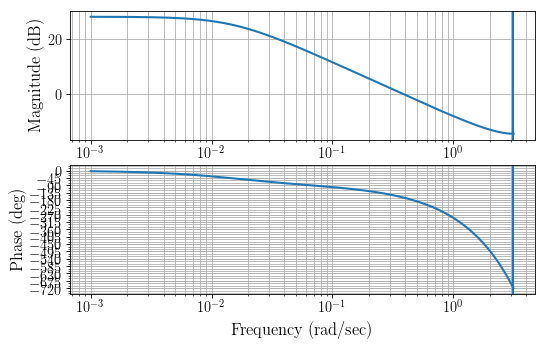

In [13]:
Kp = 25  # try 6.7 and 25
H = control.tf([Kp * 0.015], [1, -0.985, 0, 0, 0], 1)

mag, phase, omega = control.bode_plot(H, dB=True, omega_limits=[1e-3, math.pi], omega_num=100000)

mag = [20 * math.log10(m) for m in mag]
phase = [p * 180 / math.pi for p in phase]

In [14]:
gm, pm, sm, wc, wx, ws = stability_margins(H, omega)

print('Marge de gain: {:.2f} dB à {:.2f} rad/s'.format(gm, wc))
print('Marge de phase: {:.2f} deg à {:.2f} rad/s'.format(pm, wx))
print('Marge de retard: {:.2f} s'.format(pm/wx*math.pi/180))
print('Marge de module: {:.2f} dB'.format(sm))

Marge de gain: 1.60 dB à 0.46 rad/s
Marge de phase: 16.08 deg à 0.38 rad/s
Marge de retard: 0.74 s
Marge de module: -16.66 dB


Si le retard réel était de $4\, \mathrm{s}$ au lieu de $3$, le système pour $K_p = 25$ deviendrait instable car la marge de retard est inférieure à l'erreur!

## 7.6 Ecarts permanents

### Montage en asservissement

Après l'atténuation du régime transitoire, il peut subsister ou non un écart entre la consigne et la sortie du processus. Cet écart est appelé écart permanent d'asservissement et est défini comme la limite, pour $k$ tendant vers l'infini, de l'écart $e(k) = y_c(k) - y(k)$.

La fonction de transfert reliant l'erreur à la consigne est rappelée ici:

\begin{align}
  E(z) &= \frac{1}{1+K(z)G(z)} Y_c(z) \\
       &= S(z) Y_c(z)
\end{align} 

Le système étant supposé stable à ce stade de l'étude, les zéros de $1+K(z)G(z)$ sont tous à l'intérieur du cercle unité.

La fonction de transfert en boucle ouverte est réécrite en faisant apparaître le pôle $z=1$ de multiplicité $l$ (soit l intégrateurs):

$$ K(z)G(z) = \frac{B(z)}{(z-1)^l A(z)} $$

#### Définition

L'entier $l$ est appelé type ou classe du système en boucle ouverte.
***

#### Définition

Le gain permanent du système en boucle ouverte est le nombre:

$$ \gamma = \lim_{z \rightarrow 1} (z-1)^l K(z)G(z) = \frac{B(1)}{A(1)} $$
***

Lorsque $l = 0$, $l = 1$ et $l = 2$, $\gamma$ porte respectivement les dénominations gain statique, en vitesse et en accélération.

#### Exemple

Pour $l=0$, lorsque la consigne est un saut unité discret, on obtient:

\begin{align}
  E(z) &= \frac{1}{1+K(z)G(z)} \frac{z}{z-1} \\
       &= \frac{1}{1 + \frac{B(z)}{A(z)}} \frac{z}{z-1}
\end{align}  

Et donc, par le théorème de la valeur finale:

$$ \lim_{k \rightarrow \infty} e(k) = \lim_{z \rightarrow 1} (z-1) \frac{1}{1+K(z)G(z)} \frac{z}{z-1} = \frac{1}{1+\gamma} $$
***

Ce type de tableau ayant déjà été construit dans le cours d'analyse des systèmes continus, seul le tableau final est donné. L'étudiant est invité à le démontrer lui-même comme exercice.

| $$ \frac{\text{Consigne}}{\text{Type du système en BO}} $$ | $$ y_c(k) = 1 $$ | $$ y_c(k) = kh $$ | $$ y_c(k) = \frac{1}{2}(kh)^2 $$ |
|:-:|:-:|:-:|:-:|
| $$ 0 $$ | $$ \text{Statisme}\, \frac{1}{1+\gamma} $$ | $$ \infty $$ | $$ \infty $$ |
| $$ 1 $$ | $$ 0 $$ | $$ \text{Traînée}\, \frac{h}{\gamma} $$ | $$ \infty $$ |
| $$ 2 $$      | $$ 0 $$      | $$ 0 $$      | $$ \frac{h^2}{\gamma} $$      |

On remarque aisément qu'au plus $\gamma$ est grand, au plus l'écart permanent d'asservissement sera faible. Cependant, un grand gain permanent signifie aussi des marges de stabilité plus faibles. On voit donc apparaître clairement un dilemme précision-stabilité.

### Montage en régulation

Suite à une perturbation, le système dynamique passe par une phase transitoire et fini par se stabiliser (on suppose à nouveau le système BIBO stable). Il peut, comme dans le cas précédent, subsister ou non un écart permanent de régulation, défini comme $\lim_{k \rightarrow \infty} -y(k)$.

Dans ce cas, les pôles $z=1$ sont mis en évidence pour le système ainsi que le régulateur.

$$ K(z) = \frac{S(z)}{(z-1)^l R(z)} $$

$$ G(z) = \frac{B(z)}{(z-1)^{l'} A(z)} $$

#### Définition

L'entier $l'$ est appelé type ou classe du régulateur.
***

#### Définition

Le gain permanent du régulateur est le nombre:

$$ \gamma = \lim_{z \rightarrow 1} (z-1)^l K(z) = \frac{S(1)}{R(1)} $$
***

Dans les définitions précédentes, le régulateur désigne seulement l'élément positionné en amont de la perturbation.

Pour les mêmes raisons que le tableau des erreurs d'asservissement, le tableau final est donné sans développement. L'étudiant est invité à le démontrer comme exercice. Attention tout de même au fait que la perturbation étant d'origine analogique, elle ne peut être discrétisée qu'à condition d'être lente ou constante.

| $$ \frac{\text{Perturbation}}{\text{Type du régulateur}} $$ | $$ w(k) = 1 $$ | $$ w(k) = kh $$ | $$ w(k) = \frac{1}{2}(kh)^2 $$ |
|:-:|:-:|:-:|:-:|
| $$ 0 $$ | $$ \text{Statisme}\, \left\{ \begin{array}{rl} -\frac{G(1)}{1+K(1)G(1)} \quad \text{si}\: l' = 0 \\ -\frac{1}{K(1)} \quad \text{si}\: l' > 0 \end{array} \right. $$ | $$ \infty $$ | $$ \infty $$ |
| $$ 1 $$ | $$ 0 $$ | $$ -\frac{h}{\gamma} $$ | $$ \infty $$ |
| $$ 2 $$ | $$ 0 $$ | $$ 0 $$ | $$ -\frac{h^2}{\gamma} $$ |

On remarque à nouveau qu'au plus les gains sont élevés, au plus la précision sera meilleure.

Il est à remarquer que les montages en asservissement et en régulation ne se comportent pas exactement de la même manière. Alors que les écarts permanents d'asservissement dépendent de l'entièreté de la boucle ouverte, les écarts permanent de régulation, eux, dépendent principalement du régulateur positionné en amont de la perturbation.

#### Exemple

Soit un moteur DC, commandé en position, dont la fonction de transfert est:

$$ G(s) = \frac{4}{s(s+2)} $$

Ce moteur est commandé par un régulateur proportionnel de gain $K_p$.

On a donc, après échantillonnage de la fonction de transfert du moteur pour $h = 0.025\, \mathrm{s}$:

$$ K(z) = K_p $$

$$ G(z) = \frac{10^{-3}(1.23z+1.21)}{(z-1)(z-0.95)} $$

Le régulateur est de type 0 et le moteur de type 1.

D'après les tableaux, comme le type de la boucle ouverte est de 1, le statisme d'asservissement est nul pour une consigne en forme d'échelon, alors que le statisme de régulation vaut $-1/K_p$ pour une perturbation constante.

## 7.7 Principe des vases communicants

#### Théorème

Soient un système stable en boucle fermée et $p_i, \, i=1, 2, \dots, P$, les pôles de $K(z)G(z)$ à l'extérieur du cercle unité, en comptant leurs multiplicités. La fonction de transfert $K(z)G(z)$ est supposée strictement propre. Alors la fonction de sensibilité harmonique satisfait l'égalité:

$$ \int_0^{\omega_N} \log \left| S(e^{j\omega h})\right| d\omega = \omega_N \sum_{i=1}^{P} \log |p_i| $$

En français, cela signifie que la surface sous la courbe des gains de la fonction de sensibilité $S(z)$ est égale à une constante inhérente au système en boucle ouverte, valant la somme des amplitudes des pôles instables de ce dernier mutlipliés par $\omega_N$.

Autrement dit, quoique nous fassions, la fonction de sensibilité possédera une allure telle que, dans l'intervalle $[0, \omega_N]$, la surface sera constante. Cela aura pour conséquence que si on crée une grande surface négative d'un côté de l'interval, une surface positive proportionnelle sera générée de l'autre côté. Cela se fera évidemment par l'apparition d'un pic de sensibilité.

Attention tout de même que l'égalité est définie pour un graphique dont le gain est défini en décibels, et les 2 axes étant linéaires.

Voyons maintenant en quoi ce principe des vases communicants est important.

Rappelons tout d'abord que la robustesse dépend de la marge de module:

$$ m = \frac{1}{\max_{\omega \in [0, \omega_N]} \left| S(e^{j\omega h})\right|} $$

Il faut donc, pour avoir une bonne marge de module, et donc une bonne robustesse, que le pic de sensibilité soit le plus faible possible.

Cependant, pour avoir une bonne précision en régime permanent en boucle fermée, il faut augmenter les gains afin que la fonction de sensibilité soit proche de 0, car:

$$ \frac{E(z)}{Y_c(z)} = \frac{1}{1+K(z)G(z)} = S(z) $$

Le régime permanent étant souvent en basse fréquence, cela signifie que le terme $\left| 1 + K(z)G(z) \right|$ doit être le plus élevé possible à basse fréquence. Cela crée donc une surface négative importante dans le diagramme de $\left| S(e^{j\omega h}) \right|$, du côté des basses fréquences. Comme, en général, on aimerait que la bande passante soit la plus grande possible, on essaye de garder des grands gains sur une large plage de fréquences. Mais alors, par le théorème plus haut, afin que l'égalité soit respectée, il faut générer une surface positive importante du côté des hautes fréquences. Au plus la plage de fréquence en dehors de la bande passante imposée sera faible, au plus, afin de garantir l'égalité, le pic de sensibilité sera élevé. Cela a pour impact une très mauvaise marge de module.

Ce théorème permet de comprendre pourquoi un système instable est difficile à contrôler avec des marges suffisantes. En effet, le second membre de l'égalité devient positif, imposant à la courbe de sensibilité d'avoir une surface positive plus importante que la surface négative.

#### Exemple

Soit le système suivant, avec $h=1\, \mathrm{s}$:

$$ K(z)G(z) = K_p \frac{0.015}{z^3(z-0.985)} $$

Comme le système ne possède aucun pôle instable, le théorème donne:

$$ \int_0^{\pi} \log \left| S(e^{j\omega h})\right| d\omega = 0 $$

La marge de module pour Kp = 6.7 vaut: -2.653020122061182
La marge de module pour Kp = 25 vaut: -16.662833773879168


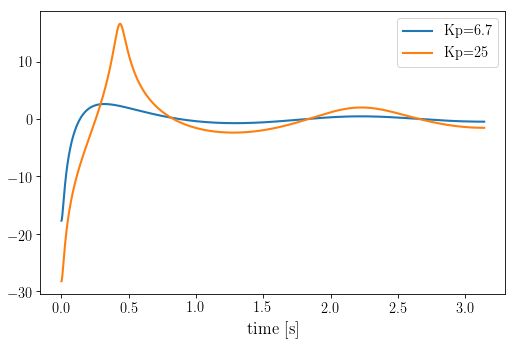

In [15]:
Kp = [6.7, 25]

fig, ax = plt.subplots()

for k in Kp:
    H = control.tf([k * 0.015], [1, -0.985, 0, 0, 0], 1)

    S = 1 / (1 + H)
    mag, phase, omega = control.bode_plot(S, Plot=False, omega_limits=[1e-3, math.pi], omega_num=100000)

    mag = [20 * math.log10(m) for m in mag]

    ax.plot(omega, mag, label='Kp={}'.format(k))

    print('La marge de module pour Kp = {} vaut: {}'.format(k, -max(mag)))

    ax.set_xlabel("time [s]")
_ = ax.legend()

On remarque qu'en augmentant le gain $K_p$, le minimum de $S(e^{j\omega h})$, obtenu pour $\omega = 0$, est beaucoup plus faible. Cela se traduit donc par une très faible sensibilité de l'erreur par rapport à l'entrée. L'erreur est donc proche de 0 pour une entrée basse fréquence.

Le pic de sensibilité aussi augmente considérablement avec $K_p$, engendrant une piètre marge de robustesse.

|    $\frac{\text{Consigne}}{\text{Type du système en BO}}$    |    $y_c(k) = 1$    |    $y_c(k) = kh$    |    $y_c(k) = \frac{1}{2}(kh)^2$    |
|   :-:   |   :-:   |   :-:   |   :-:   |
|    $0$    |    $\text{Statisme}\, \frac{1}{1+\gamma}$    |    $\infty$    |    $\infty$    |
|    $1$    |    $0$    |    $\text{Traînée}\, \frac{h}{\gamma}$    |    $\infty$    |
|    $2$    |    $0$    |    $0$    |    $\frac{h^2}{\gamma}$    |